In [1]:
library(R2jags)

Warning message:
"package 'R2jags' was built under R version 4.0.3"
Loading required package: rjags

Warning message:
"package 'rjags' was built under R version 4.0.3"
Loading required package: coda

Warning message:
"package 'coda' was built under R version 4.0.3"
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




**PROBLEM 1: TUMOR COUNT DATA**

In [40]:
ya = c(12, 9, 12, 14, 13, 13, 15, 8, 15, 6) #tumor count data for 10 mice
yb = c(11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7) #tumor count data for 13 mice

1) Find the posterior distribution (formula),posterior mean (in formula), variance and 95% credible intervals for $\theta_a$ and $\theta_b$ (values), assuming a Poisson sampling distribution for each group and the following prior distribution:

$\theta_a \sim gamma(120,10)$

$\theta_b \sim gamma(12, 1)$

$p(\theta_a, \theta_b) = p(\theta_a)p(\theta_b)$ I.e. they are independent

In [156]:
sum_ya = sum(ya)
sum_yb = sum(yb)

The posterior of $y_A$ = gamma(117 + 120, 10 + 10) = gamma(237, 20), mean = 11.85

The posterior of $y_B$ = gamma(113 + 12, 13 + 1) = gamma(125, 14), mean = 8.93

2) The posterior mean should approach the mean of $y_A$ if $n_A$ is very large (and vice versa), and the variance will be smaller. 

3) Compute and plot the posterior expectation $\theta_B$ under the prior $\theta_B ~ gamma(12\cdot n_0, n_0)$ for n 1 through 50. Comment on what sort of prior beliefs about $\theta_B$ would be nessecary in order for the posterior expectation of $\theta_B$ to be close to that of $\theta_A$. 

We'd need a prior belief of around gamma(600,50) for $\theta_B$ in order to make its posterior expectation about the same as $\theta_A$. 

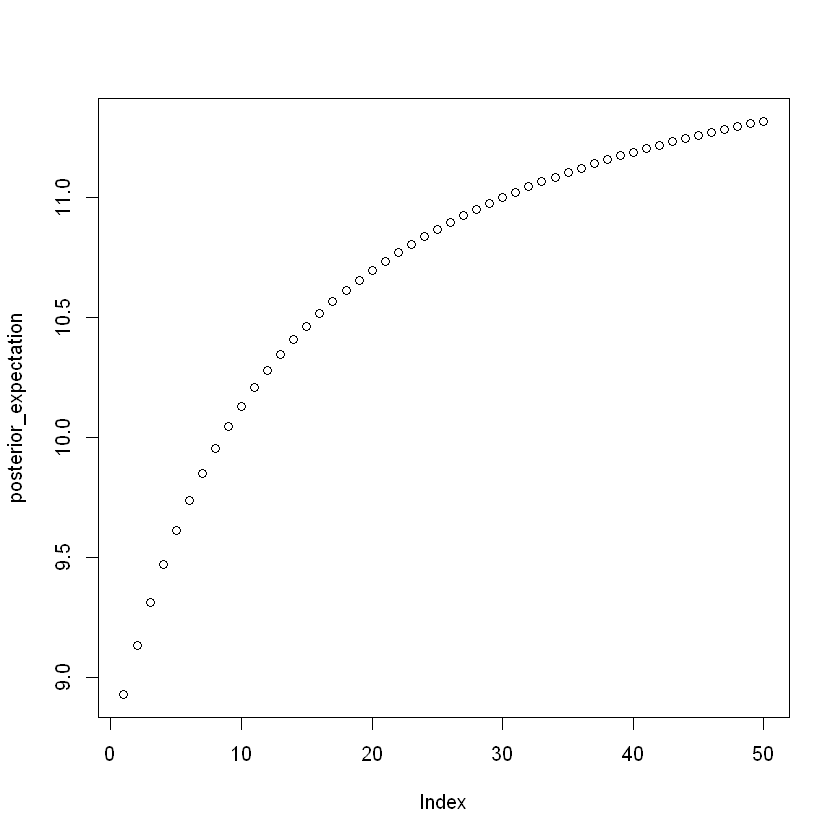

In [45]:
N = 1:50
posterior_expectation = c()
for(n in N){
    posterior_expectation = c(posterior_expectation, (113 + 12*n)/(n + 13))
}
plot(posterior_expectation)

4) Should knowledge about population A tell us anything about population B? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A)p(\theta_B)$. 

I don't think it makes much sense to assume they are COMPLETELY independent. It says "type B mice are related to type A mice", so I assume that we have more even more reason to believe that they should behave similarly. Plus, I'm sure there is some kind of baseline cancer rate that mice A and mice B will both be close to. That being said, it's very plausible that different mice strains will be more or less susceptible to specific kinds of cancers.

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "detroit" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "houston" in data"
Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "dodgers" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 14
   Unobserved stochastic nodes: 28
   Total graph size: 128

Initializing model



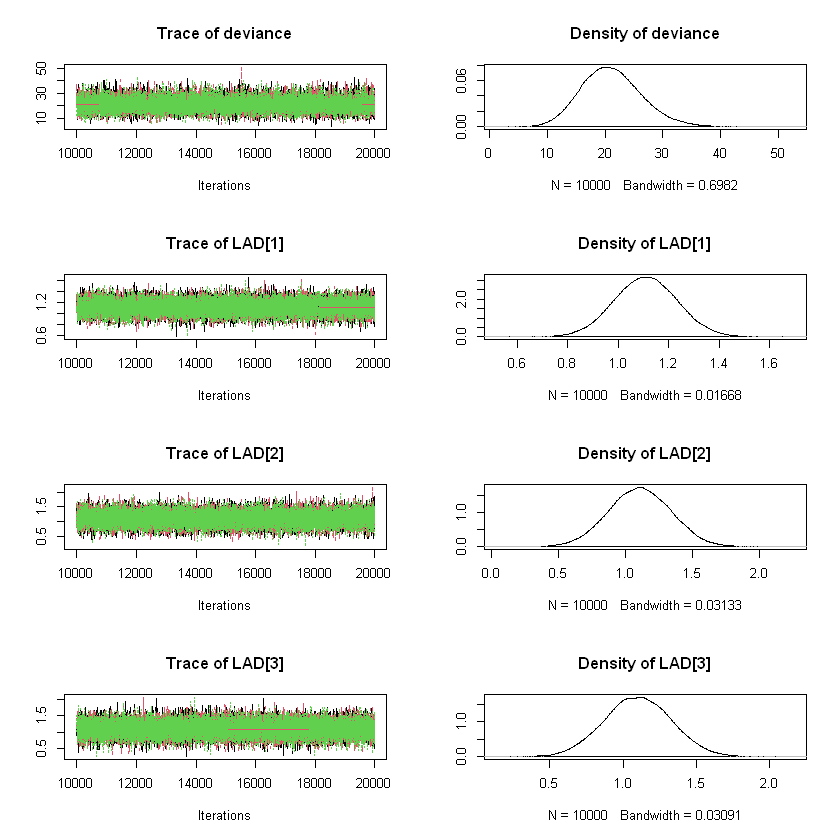

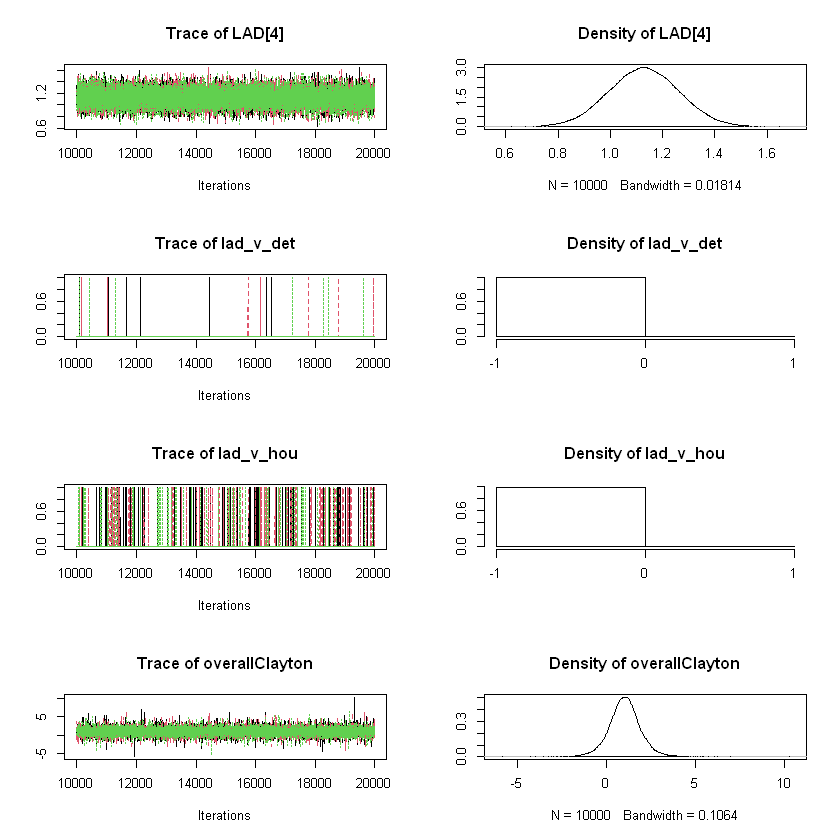

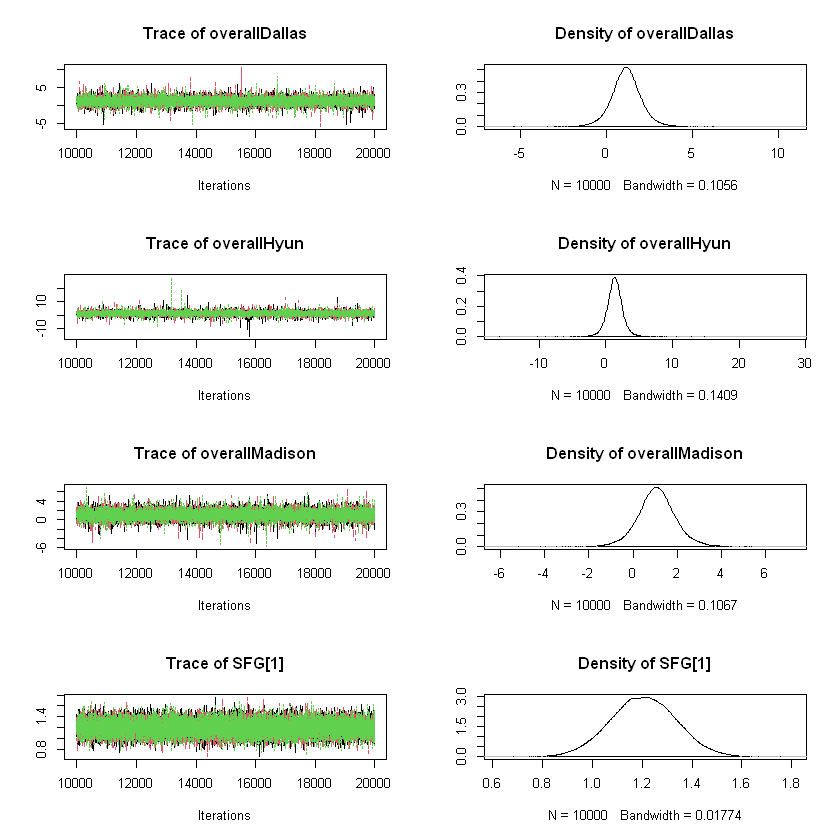

Inference for Bugs model at "5", fit using jags,
 3 chains, each with 20000 iterations (first 10000 discarded)
 n.sims = 30000 iterations saved
               mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
LAD[1]           1.109   0.124  0.865  1.025  1.108  1.192  1.352 1.001 30000
LAD[2]           1.106   0.232  0.651  0.949  1.106  1.264  1.561 1.001 30000
LAD[3]           1.101   0.229  0.655  0.946  1.101  1.256  1.551 1.001 20000
LAD[4]           1.129   0.135  0.865  1.039  1.129  1.219  1.393 1.001 14000
SFG[1]           1.205   0.132  0.948  1.117  1.205  1.294  1.463 1.001 30000
SFG[2]           1.252   0.165  0.930  1.141  1.251  1.364  1.577 1.001 30000
SFG[3]           1.190   0.150  0.894  1.090  1.190  1.292  1.481 1.001 13000
SFG[4]           1.360   0.196  0.976  1.228  1.361  1.492  1.744 1.001 13000
lad_v_det        0.001   0.026  0.000  0.000  0.000  0.000  0.000 1.001 30000
lad_v_hou        0.008   0.090  0.000  0.000  0.000  0.000  0.000 1.004 1600

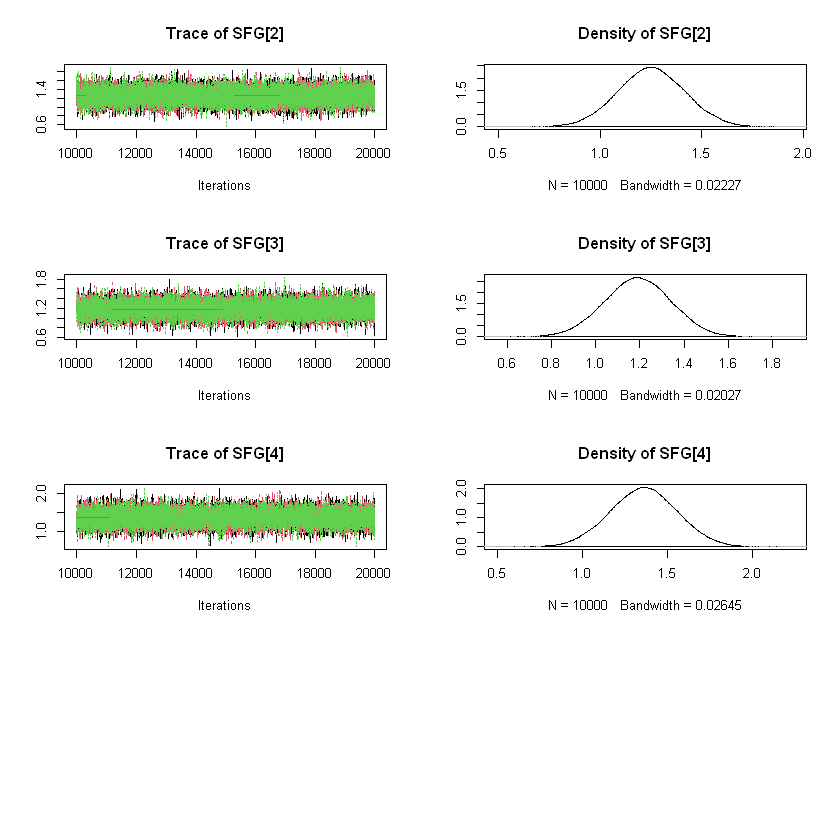

In [183]:
prior_variance = 0.1758719^2
prior_mean = 1.2493256

print(LAD_mean)
print(HOU_mean)
print(DET_mean)
LAD_mean = mean(LAD_all)
LAD_variance = var(LAD_all)
LAD_size = length(LAD_all)
HOU_mean = mean(HOU_all)
HOU_variance = var(HOU_all)
HOU_size = length(HOU_all)
DET_mean = mean(DET_all)
DET_variance = var(DET_all)
DET_size = length(DET_all)

posterior <- function(prior_variance, prior_mean, sample_mean, sample_variance, sample_size){
posterior_mean = (sample_variance*prior_mean + sample_size*prior_variance * sample_mean)/(sample_size*prior_variance + sample_variance)
posterior_variance = (prior_variance*sample_variance)/(sample_size*prior_variance + sample_variance)
return(c(posterior_mean, posterior_variance))
}

posterior(prior_variance, prior_mean, LAD_mean, LAD_variance, LAD_size)
posterior(prior_variance, prior_mean, HOU_mean, HOU_variance, HOU_size)
posterior(prior_variance, prior_mean, DET_mean, DET_variance, DET_size)

[1] 1.1145
[1] 1.2589
[1] 1.344294


[1] 1.123100408 0.001973057

[1] 1.258522374 0.001219955

[1] 1.336274273 0.002612036

In [14]:
library(mlmRev)

Warning message:
"package 'mlmRev' was built under R version 4.0.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 4.0.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




Oasis II Non-Inferiority Trial 

In [48]:
study = read.csv("heart_attack_study.csv")
num_placebo=study$ctrln
num_control=study$trtn
placebo_deaths=study$ctrl
control_deaths=study$trt
num_studies=6

1) Discuss a model that you may use to determine if the minimal efficacy requirement for Hirudin is satisfied in the Oasis II trial using historical control data. 

First, I am modelling all of the death/adverse events for the active control, placebo, and treatment as binomial (a separate binomial for each trial) because I am assuming that we have variation across studies. I used 3 different beta priors (one for placebo, control, treatment). The beta priors are ultimately linked together by their mean $\mu$ being distributed as beta(.5,.5), and the $\alpha$ parameter being the product of $\mu$ and a a lognormally distributed value. 

Deaths in placebo study i, i = 1...6 $\sim binomial(\theta_i^P, N_i^P)$ <break>
    
Deaths in control study i, i = 1...7 $\sim binomial(\theta_i^C, N_i^C)$ <break>
    
Deaths in treatment study i, i = 1 $\sim binomial(\theta_i^T, N_i^T)$ <break>
    
$\theta_i^P \sim beta(\alpha^P, \beta^P)$
    
$\theta_i^C \sim beta(\alpha^C, \beta^C)$
    
$\theta_i^T \sim beta(\alpha^T, \beta^T)$

$\mu^P, \mu^C, \mu^T \sim beta(.5, .5)$
    
$\eta^P, \eta^C, \eta^T \sim lognormal(0, 1/20)$
    
$\beta^P \sim \eta^P \cdot(1 - \mu^P)$
    
$\beta^T \sim \eta^T \cdot(1 - \mu^T)$
    
$\beta^C \sim \eta^C \cdot(1 - \mu^C)$
    
2) Discuss the efficacy of Hirudin with respect to the placebo. In addition, comment on the efficacy of Hirudin with respect to Heparin. 

With my choice of model, I did not find that we should be using Hirudin over either Heparin or the placebo with the data we have, but this was highly dependent on the parameters I chose for the lognormal(m, 1/C) prior. I used lognormal(0, 1/20), in general as we increase C we get more confidence that Hirudin is better than both Heparin and the placebo, but we also get a lot of stability/convergence issues (convergence is fine with the parameters ultimately used, but being noticeably very poor up at C = 100, for example). 

As a baseline with my model, it thinks that Heparin is better than the placebo around 68% of the time, while Hirudin is better than the placebo 60% of the time, and Hirudin is better than Heparin only 45% of the time.  

3) What would happen to the distribution of responses for patients assigned to Hirudin, the Heparin and the placebo treatment arms in a large phase III trial? Assume that the Phase III trial enrolls 500 patients in each arm. 

It's a little tricky, because what my model is predicting for the median and the average of the Hirudin responses are very different. Overall, I would call this is a risky treatment. On average, we would predict Hirudin to be worse (79.57 deaths, as opposed to 61.011 from the placebo and 50.023 from the control), but the median prediction puts Hirudin as the best option(35 deaths, compared to 56 from the placebo and 36 from the control). I could see this being used as some kind of last-ditch experimental drug but the issue is that the distribution has a very long tail going out to the right side, that I think would make it potentially dangerous (based on how I chose the priors). 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 14
   Unobserved stochastic nodes: 23
   Total graph size: 72

Initializing model



Inference for Bugs model at "5", fit using jags,
 3 chains, each with 20000 iterations (first 10000 discarded)
 n.sims = 30000 iterations saved
                            mu.vect sd.vect   2.5%    25%    50%     75%
control                      50.148  41.920  5.000 20.000 38.000  68.000
control_better_than_placebo   0.331   0.471  0.000  0.000  0.000   1.000
hirudin_better_than_control   0.522   0.500  0.000  0.000  1.000   1.000
hirudin_better_than_placebo   0.373   0.484  0.000  0.000  0.000   1.000
mu[1]                         0.123   0.053  0.053  0.088  0.112   0.145
mu[2]                         0.100   0.083  0.012  0.040  0.076   0.136
mu[3]                         0.159   0.196  0.012  0.037  0.067   0.203
placebo                      61.565  27.611 24.000 43.000 56.000  74.000
treatment                    79.684  98.267  5.000 18.000 34.000 102.000
deviance                     66.189   5.053 58.322 62.506 65.527  69.172
                              97.5%  Rhat n.eff
contr

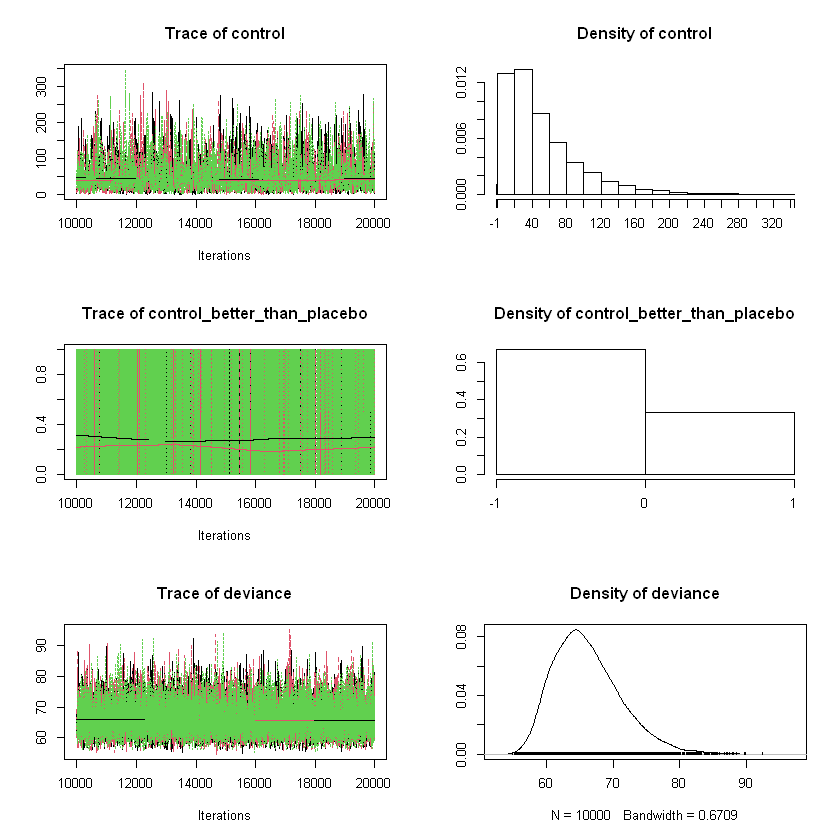

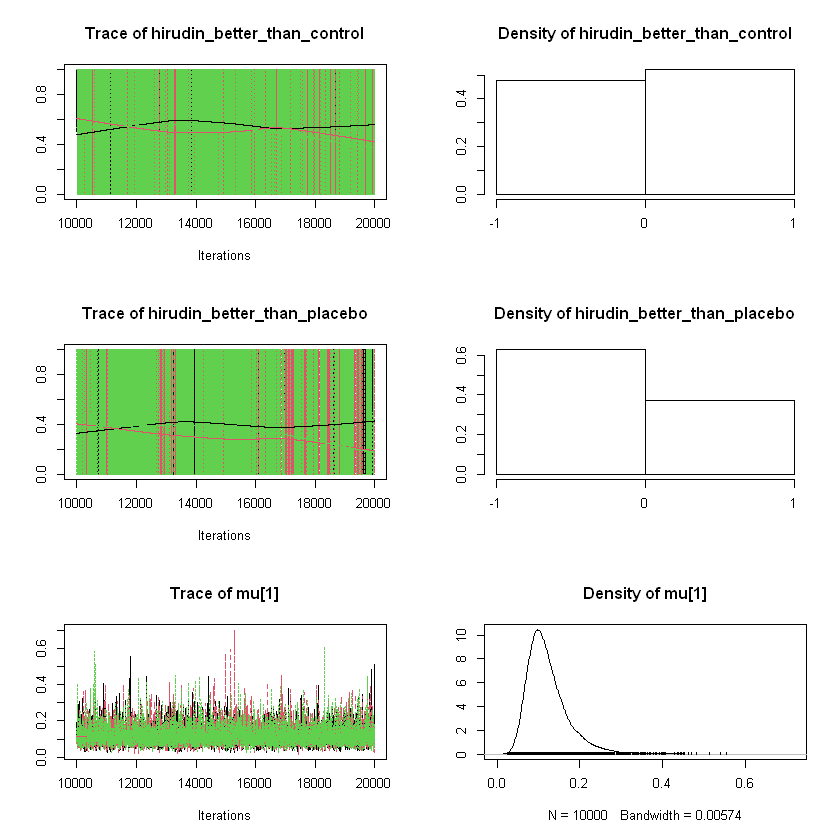

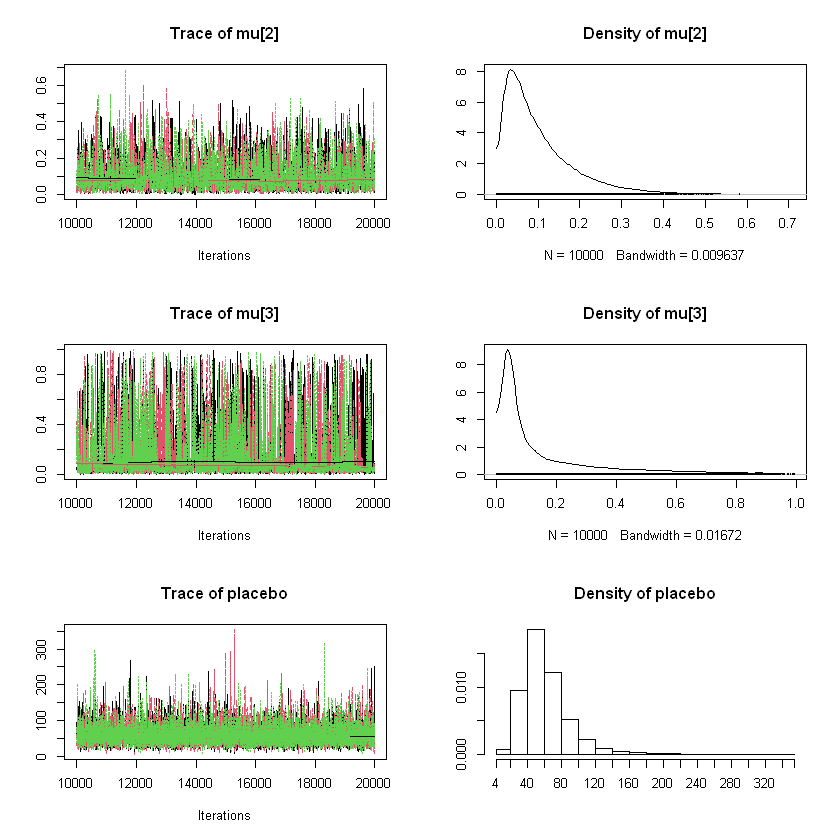

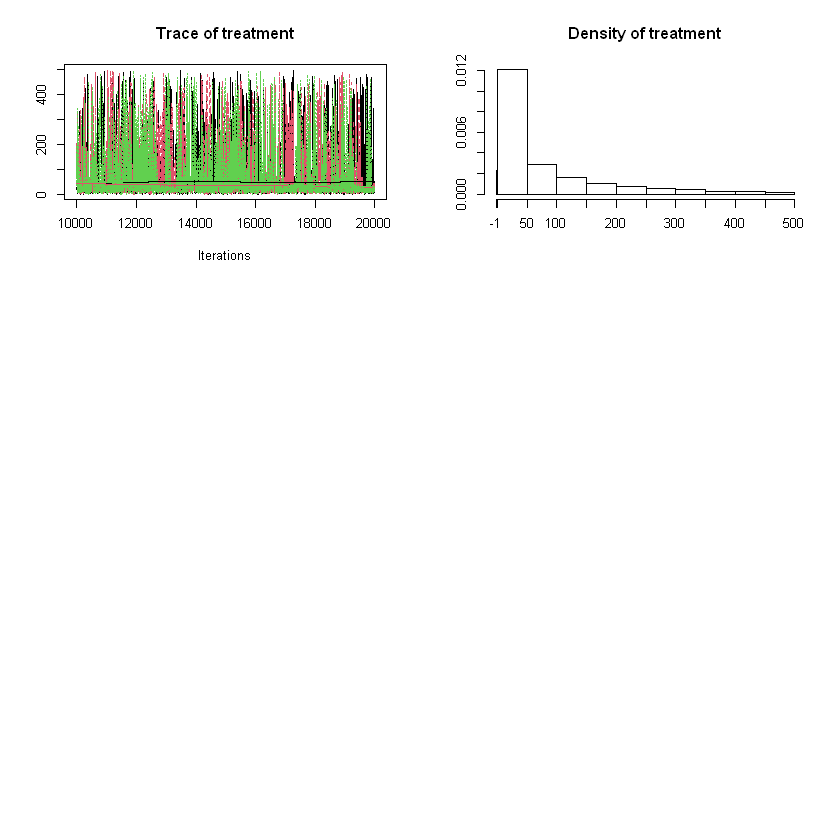

In [186]:
jags.data=list(new_control_deaths = 213, new_num_control = 5058, treatment_deaths = 182, num_treatment = 5083, control_deaths=control_deaths,placebo_deaths=placebo_deaths, num_control=num_control, num_placebo=num_placebo,  m=0)

model_string <- "model {
#1 = placebo, 2 = active control, 3 = hirudin
for(i in 1:6){
    placebo_deaths[i] ~ dbinom(p_placebo[i], num_placebo[i])
    control_deaths[i] ~ dbinom(p_control[i], num_control[i])
    p_placebo[i] ~ dbeta(alpha[1], beta[1])
    p_control[i] ~ dbeta(alpha[2], beta[2])
}

new_control_deaths ~ dbinom(p_control[7], new_num_control)
p_control[7] ~dbeta(alpha[2], beta[2])

treatment_deaths ~ dbinom(p_treatment, num_treatment)
p_treatment ~ dbeta(alpha[3], beta[3])

for(j in 1:3){
alpha[j] = eta[j]*mu[j]
beta[j] = eta[j]*(1-mu[j])
eta[j] ~ dlnorm(m, 1/20)
mu[j] ~ dbeta(.5,.5)
}

control_better_than_placebo=step(mu[2]-mu[1]) #smaller is better, shows heparin better than aspirin
hirudin_better_than_placebo = step(mu[3] - mu[1])
hirudin_better_than_control = step(mu[3] - mu[2])

###500 person trials
control ~ dbinom(mu[2], 500)
placebo ~ dbinom(mu[1], 500)
treatment ~ dbinom(mu[3], 500)
}"
 
jags.param <- c("control", "treatment", "placebo", "mu", "control_better_than_placebo", "hirudin_better_than_placebo", "hirudin_better_than_control") 
jags.fit <- jags(data=jags.data, 
                 parameters.to.save = jags.param,
                 model.file=textConnection(model_string),  
                 n.iter=20000, n.chains=3,
                 n.burnin=10000, 
                 n.thin=1, DIC=T)
oasis.mcmc=as.mcmc(jags.fit)
jags.fit
plot(oasis.mcmc)

**Anklyosing Spondylitis**

Based on the information on the prior of Secukinumab, with the mode being equal to .333 and the median being .35, this corresponds to a prior of beta(4.961, 8.934) that we can use in our analysis. 

Like before, I modelled each study using a binomial distribution, and tied the studies together using a beta distribution, because everyone in this group is going to have a common condition that led them to try experimental drugs. However, I also factored in the beta prior of the treatment, which I calculated based off what the researchers said. 

responders in historical study i $ \sim binomial(p_i, n_i)$

$p_i \sim beta(\alpha, \beta)$

$\alpha \sim \eta \cdot \mu$

$\beta \sim \eta \cdot (1 - \mu)$

$\eta \sim normal(0, 1/3)$

$\mu \sim beta(1,1)$ 

Secukinumab responses $\sim beta(4.961, 8.934)$


Based on the results of my model, I would absolutely recommend Secukinumab for further study because it seems very promising. Combining the results of the new study with the beta prior the researchers had, the mean response is estimated to be .51, with a 99% chance that the mean response of Secukinumab is higher than the mean response from the placebo. The convergence of my model looked fine. 

Some critical differences between case A and case B: first, in case A we were not given a prior for the probability of response, which ending up kind of muddling the analysis. To contrast, in case B, although I am choosing eta $\sim$ dlnorm(0, 1/3) and mu $\sim$dbeta(1,1), the results are fairly insensitive to these choices. In case A, the efficacy of Hirudin had a high dependency on the parameters I used for the priors. Ultimately, I think these two cases highlight the important of having a good prior. Another fundamental difference between case A and case B is that in case B we have access to current data on the placebo as well. 

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8
   Unobserved stochastic nodes: 12
   Total graph size: 49

Initializing model



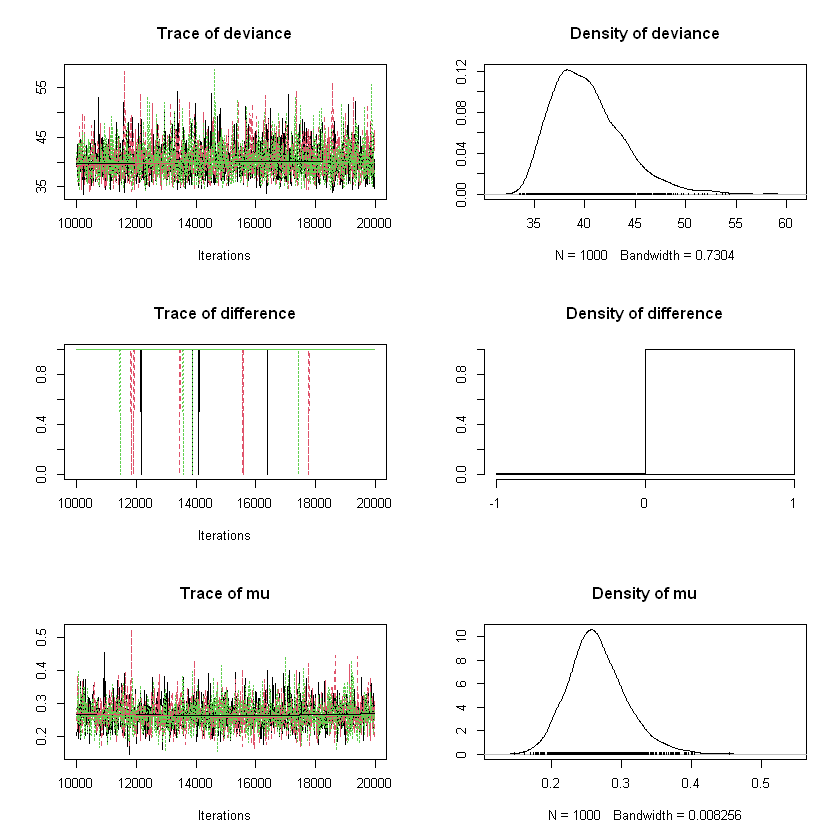

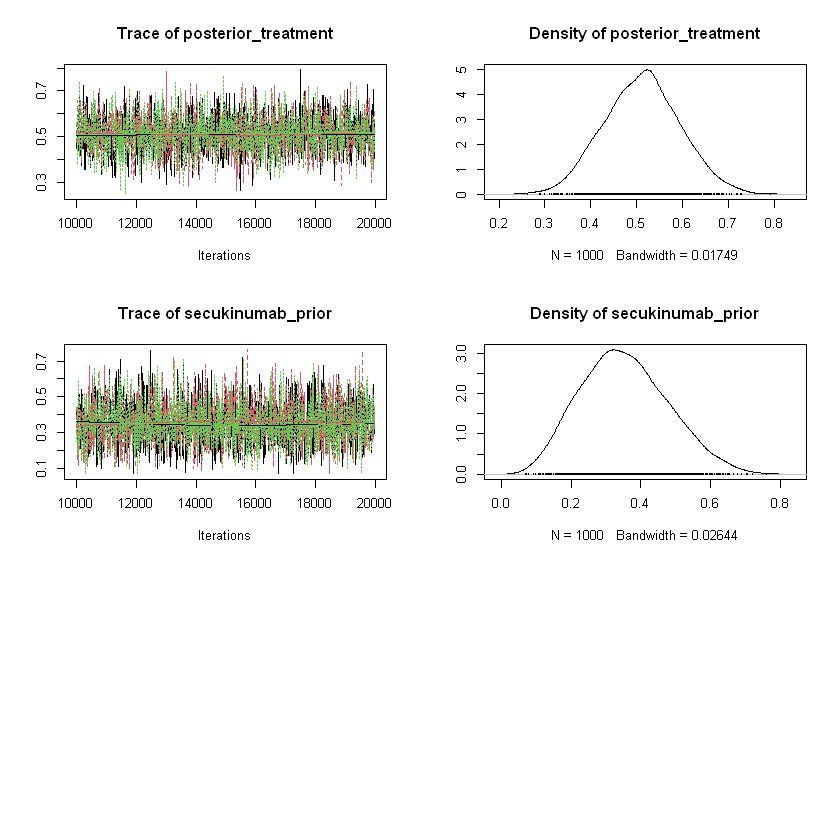

In [184]:
jags.data <- list(N=8, total_patients=c(107, 44, 51, 39, 139, 20, 78, 35, 6),
                responders=c(23, 12, 19, 9, 39, 6, 9, 10, 1), m=0, C=3, a=1,b=1)
a_s <- "model
{
  for( i in 1 : N ) {
    responders[i] ~ dbin(p[i], total_patients[i]) #for each historical study we have a binomial, true theta underlying
    p[i] ~ dbeta(alpha, beta)
  }
  alpha =eta*mu          
  beta = eta*(1-mu)
  eta ~ dlnorm(m, 1/C); 
  mu ~ dbeta(a, b);     #flat prior

  secukinumab_prior ~ dbeta(4.961, 8.934)
  posterior_treatment ~ dbeta(4.961 + 14, 8.934 + 23 - 14)
  difference = step(posterior_treatment - mu)
}" 
jags.param <- c("mu", "secukinumab_prior", "difference", "posterior_treatment")
a_s.fit <- jags(data=jags.data, 
                   parameters.to.save = jags.param,
                   model.file=textConnection(a_s),  
                   n.iter=20000, n.chains=3,
                   n.burnin=10000, 
                   n.thin=10, DIC=T)
a_s.mcmc=as.mcmc(a_s.fit)
plot(a_s.mcmc)

In [ ]:
library(tidyverse)
data=data %>% select(-K9) %>%filter(Team=="BOS" | Team=="LAD"|  Team=="LAA" |Team=="WSN" | Team=="SFG" | Team=="NYM"| Team=="NYY" | Team=="CIN" | Team=="ARI"| Team=="DET" | Team=="CLE" | Team=="HOU")
data=read.csv("pitch.csv")
head(data)
library(MASS)
library(fitdistrplus)

WHIP_data = c(data$WHIP)
HyunJinRyu = (data %>% filter( ï..Player == "Hyun-JinRyu"))
print(HyunJinRyu)
MadisonBumgarner = (data %>% filter( ï..Player == "MadisonBumgarner"))
print(MadisonBumgarner)
DallasKeuchel = (data %>% filter( ï..Player == "DallasKeuchel"))
print(DallasKeuchel)
ClaytonKershaw = (data %>% filter( ï..Player == "ClaytonKershaw"))
print(ClaytonKershaw)

LAD_2014 = c(fitdist((data %>% filter( Team == "LAD" & Year == "2014"))$WHIP, "norm")$estimate)
print(LAD_2014)
LAD_2015 = c(fitdist((data %>% filter( Team == "LAD" & Year == "2015"))$WHIP, "norm")$estimate)
print(LAD_2015)
LAD_2016 = c(fitdist((data %>% filter( Team == "LAD" & Year == "2016"))$WHIP, "norm")$estimate)
print(LAD_2016)
LAD_2017 = c(fitdist((data %>% filter( Team == "LAD" & Year == "2017"))$WHIP, "norm")$estimate)
print(LAD_2017)

HOU_2014 = c(fitdist((data %>% filter( Team == "HOU" & Year == "2014"))$WHIP, "norm")$estimate)
print(HOU_2014)
HOU_2015 = c(fitdist((data %>% filter( Team == "HOU" & Year == "2015"))$WHIP, "norm")$estimate)
print(HOU_2015)
HOU_2016 = c(fitdist((data %>% filter( Team == "HOU" & Year == "2016"))$WHIP, "norm")$estimate)
print(HOU_2016)
HOU_2017 = c(fitdist((data %>% filter( Team == "HOU" & Year == "2017"))$WHIP, "norm")$estimate)
print(HOU_2017)

SFG_2014 = c(fitdist((data %>% filter( Team == "SFG" & Year == "2014"))$WHIP, "norm")$estimate)
print(SFG_2014)
SFG_2015 = c(fitdist((data %>% filter( Team == "SFG" & Year == "2015"))$WHIP, "norm")$estimate)
print(SFG_2015)
SFG_2016 = c(fitdist((data %>% filter( Team == "SFG" & Year == "2016"))$WHIP, "norm")$estimate)
print(SFG_2016)
SFG_2017 = c(fitdist((data %>% filter( Team == "SFG" & Year == "2017"))$WHIP, "norm")$estimate)
print(SFG_2017)
WHIP_norm = fitdist(WHIP_data, "norm")
print(WHIP_norm)

hyun_norm = fitdist(HyunJinRyu$WHIP, "norm")

LAD_all = c((data %>% filter( Team == "LAD"))$WHIP)
HOU_all = c((data %>% filter( Team == "HOU"))$WHIP)
DET_all = c((data %>% filter( Team == "DET"))$WHIP)
print(length(LAD_all))

1) Propose a hierarchical model to estimate each player's intrinsic WHIP value, taking into account the player's team and season. 

To be honest, I was pretty confused by this question because and I wasn't sure why I should assume a player is any better or worse based on what team they were on (it seems like it should be the opposite, because teams are constructed of individuals? Likewise, aren't the teams being played against more important factors in determining a WHIP score?). Ultimately I calculated 12 priors, because there were 3 teams in consideration (LAD, SFG, and HOU) that were relevant, and 4 years for each of the teams (2014, 2015, 2016, 2017). I assumed that they were all normally distributed and that each player also had a normally distributed amount that represent the difference between their team's skill level and their own skill that I'm calling "delta", which I assumed to come from a normal(0,1) distribution. 

2) Write the model in Jags

4) Discuss your inference on the pitching abilities of the Houston Astros and the Los Angeles Dodgers. 
I used the average WHIP performance across all players as the prior and found the following posteriors (normal($\mu, \sigma^2)):

LA Dodgers: normal(1.123,.00197)

Houston Astros: normal(1.259, 0.00122)

Detroit Tigers: normal(1.336, 0.0026)

Overall, there is a .001 chance that the LA Dodgers are worse than the Detroit Tigers, while there is a .008 chance that they are worse than the Houston Astros. 

5) Do you see any evidence of shrinkage in the previous estimates? If so, what is the source of shrinkage? 

Yes, there is evidence of shrinkage, but I think this is unavoidable in a Bayesian setup because everything will get closer to whatever you had as the prior, but I may be misunderstanding what shrinkage in this question is referring to. There doesn't seem to be anything drastic, though: the LA Dodgers went from 1.11 to 1.12, the Detroit Tigers went from 1.344 to 1.336, and the Houston Astros, which are already literally the most average team, remained at 1.259. So anything further away from the prior mean will naturally have more of a change in its posterior.  

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 14
   Unobserved stochastic nodes: 28
   Total graph size: 128

Initializing model



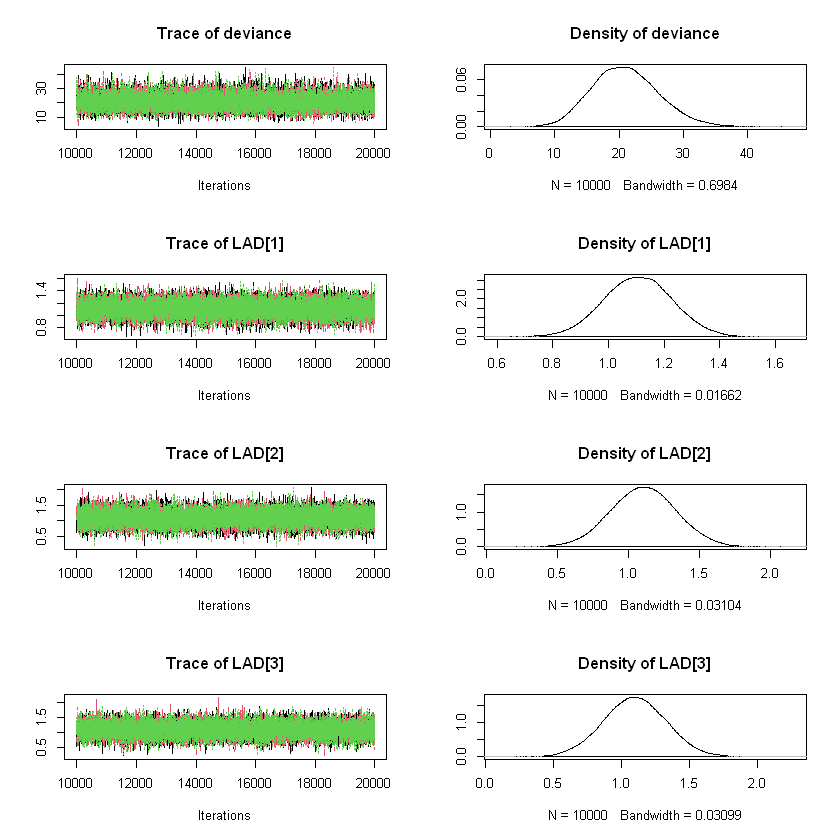

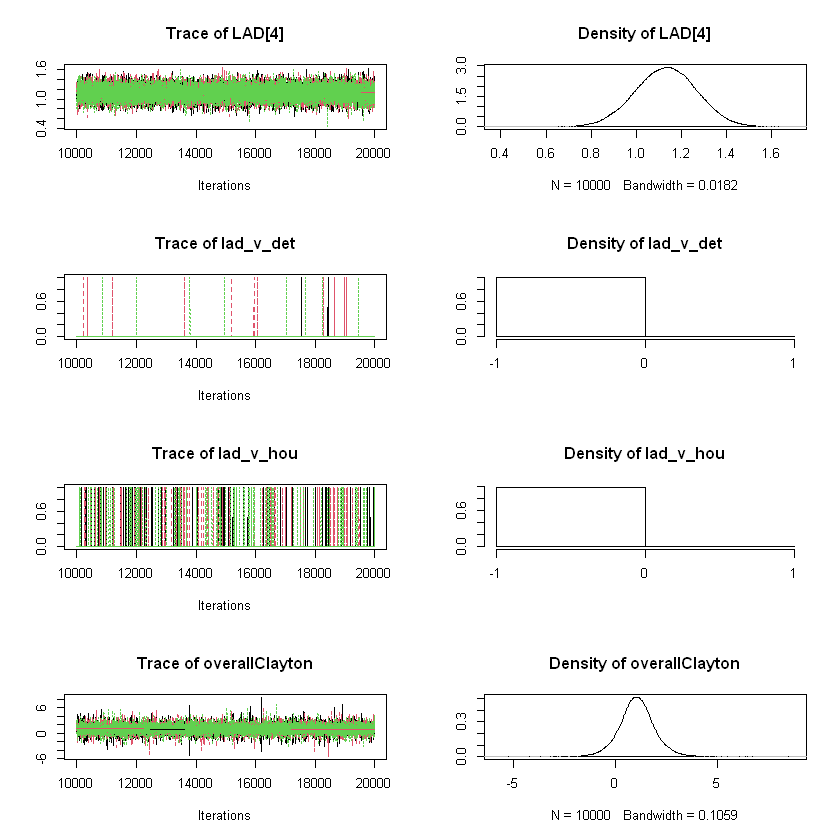

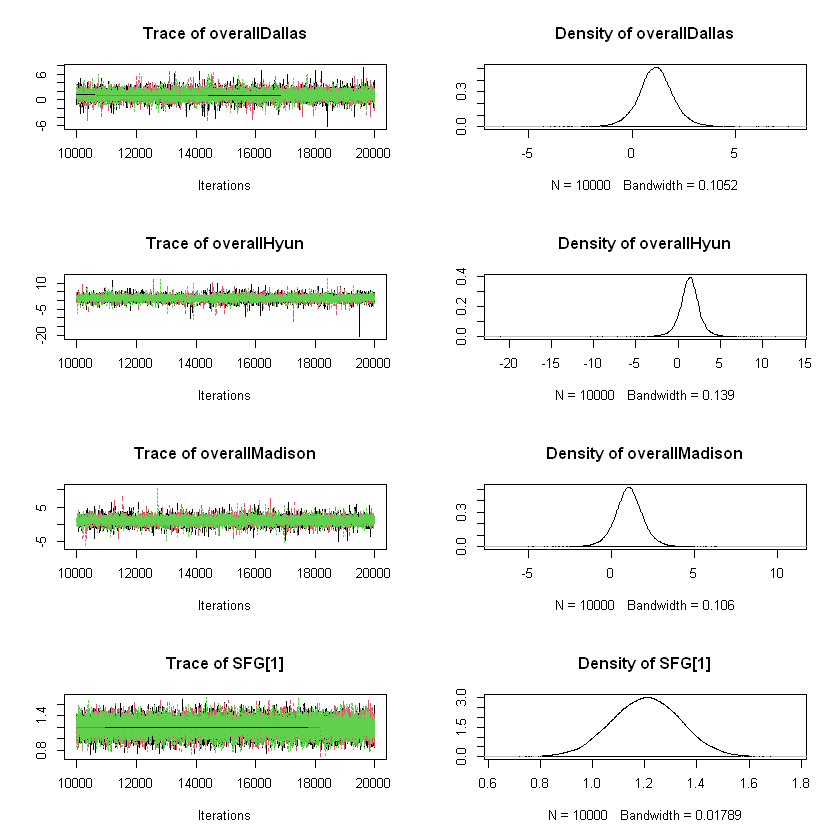

Inference for Bugs model at "7", fit using jags,
 3 chains, each with 20000 iterations (first 10000 discarded)
 n.sims = 30000 iterations saved
               mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
LAD[1]           1.107   0.123  0.865  1.023  1.107  1.190  1.347 1.001 30000
LAD[2]           1.107   0.230  0.655  0.951  1.107  1.260  1.560 1.001 30000
LAD[3]           1.099   0.230  0.645  0.945  1.098  1.253  1.549 1.001 30000
LAD[4]           1.131   0.135  0.866  1.041  1.132  1.223  1.393 1.001 30000
SFG[1]           1.205   0.133  0.943  1.116  1.206  1.295  1.464 1.001  9000
SFG[2]           1.254   0.166  0.928  1.141  1.255  1.367  1.575 1.001 30000
SFG[3]           1.188   0.150  0.895  1.086  1.187  1.288  1.486 1.001 30000
SFG[4]           1.361   0.197  0.977  1.227  1.361  1.495  1.744 1.001 30000
lad_v_det        0.001   0.026  0.000  0.000  0.000  0.000  0.000 1.065 10000
lad_v_hou        0.008   0.091  0.000  0.000  0.000  0.000  0.000 1.005 1200

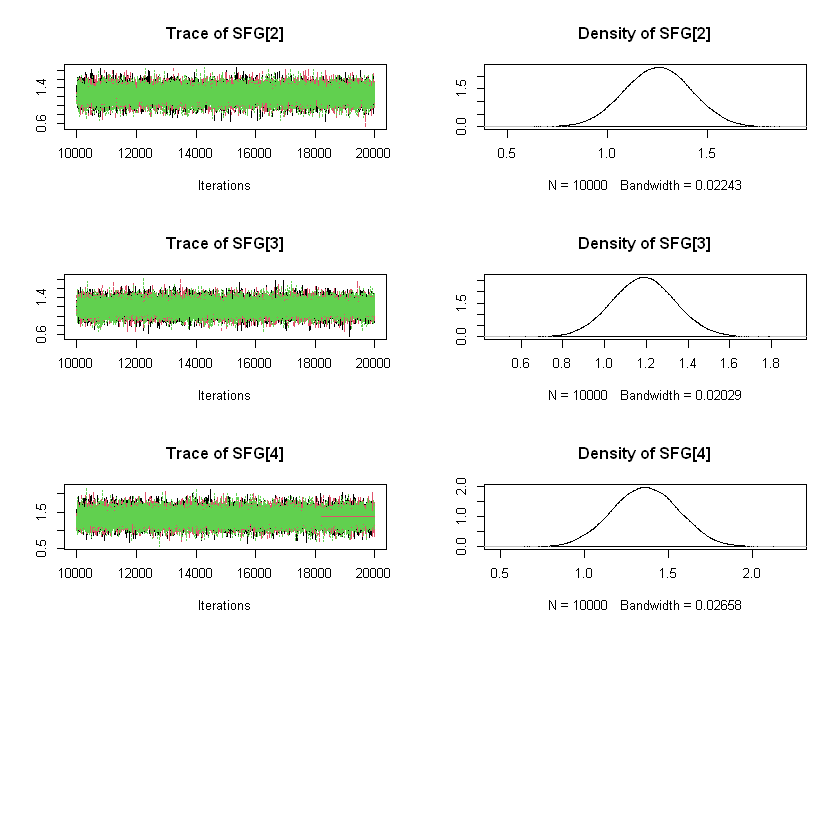

In [187]:
baseball <- "model {

###DallasKeuchel
for(i in 1:4){
Dallas[i] ~ dnorm(HOU[i] + delta3, tau3)
}
overallDallas ~ dnorm(average_player + delta3, tau3)
delta3 ~ dnorm(0,1)
tau3 ~ dgamma(1,1)

###HYUN-JINRYU
Hyun[1] ~ dnorm(LAD[1] + delta1, tau)
Hyun[2] ~ dnorm(LAD[4] + delta1, tau)
overallHyun ~ dnorm(average_player + delta1, tau)
delta1 ~ dnorm(0,1)
tau ~ dgamma(1,1)

#MADISON_BUMGARNER
for(i in 1:4) {
Madison[i] ~ dnorm(SFG[i]  + delta2, tau2)
}
delta2 ~ dnorm(0,1)
tau2 ~ dgamma(1,1)
overallMadison ~ dnorm(average_player + delta2, tau2)

###ClaytonKershaw
for(i in 1:4){
Clayton[i] ~ dnorm(LAD[i]  + delta4, tau4)
}
delta4 ~ dnorm(0,1)
tau4 ~ dgamma(1,1)
overallClayton ~ dnorm(average_player + delta4, tau4)

average_player ~ dnorm(1.2493256, 1/0.1758719^2)

LAD[1] ~ dnorm(1.1088000, 1/0.1265423^2)
LAD[2] ~ dnorm(1.1047500, 1/0.2428666^2)
LAD[3] ~ dnorm(1.1202500, 1/0.2409122^2)
LAD[4] ~ dnorm(1.1234000, 1/0.1383222^2)

HOU[1] ~ dnorm(1.2886000, 1/0.1836176^2)
HOU[2] ~ dnorm(1.197750, 1/0.113924^2)
HOU[3] ~ dnorm(1.2782000, 1/0.1883979^2)
HOU[4] ~ dnorm(1.258833, 1/0.102816^2)

SFG[1]~ dnorm(1.2020000, 1/0.1343503^2)
SFG[2] ~ dnorm(1.2578000, 1/0.1695045^2)
SFG[3] ~ dnorm(1.1885000, 1/0.1539424^2)
SFG[4] ~ dnorm(1.3695000, 1/0.2031992^2)


lad ~ dnorm(1.12310040752384, 1/0.0019730567628992)
hou ~ dnorm(1.25852237362072, 1/0.00121995459710871)
det ~ dnorm(1.33627427294004, 1/.00261203631446819)
lad_v_hou = step(lad - hou)
lad_v_det = step(lad - det)
}"

baseball.param <- c("overallHyun", "overallMadison", "overallDallas", "overallClayton", "LAD", "SFG", "lad_v_hou", "lad_v_det")
baseball.data <- list(Clayton = c(0.857,0.881,0.725,0.949), Madison = c(1.090, 1.008,1.028, 1.090), Hyun = c(1.191, 1.366), Dallas = c(1.175,1.017,1.286,1.119) )
baseball.fit <- jags(data=baseball.data, 
                 parameters.to.save = baseball.param,
                 model.file=textConnection(baseball),  
                 n.iter=20000, n.chains=3,
                 n.burnin=10000, 
                 n.thin=1, DIC=T)
baseball.mcmc=as.mcmc(baseball.fit)
plot(baseball.mcmc)
baseball.fit